In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('data/notebook-01.csv')
data.head()

,Site_ID,Sample_ID,Latitude_Degrees,Longitude_Degrees,Distance_to_Shore,Turbidity,Cyclone_Frequency,Date_Day,Date_Month,Date_Year,Depth_m,Percent_Bleaching,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Bleached,Ocean_Name_Arabian Gulf,Ocean_Name_Atlantic,Ocean_Name_Indian,Ocean_Name_Pacific,Ocean_Name_Red Sea,Exposure_Exposed,Exposure_Sheltered,Exposure_Sometimes,Term_Type_El Niño,Term_Type_La Niña,Term_Type_Neutral
0,2501,10324336,23.163,-82.5260,8519.23,0.0287,49.90,15,9,2005,10.00,50.2,301.61,302.05,300.67,296.72,304.69,1.60,8.0,-0.46,1.0,-3.56,2.24,0.0,3.13,17.00,3.0,0.00,1.63,7.88,0.98,-0.80,1.60,-6.12,1.83,-2.17,0.00,1.09,5.0,0.0,0.00,0.74,7.25,0.18,2005-09-15,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3467,10324754,-17.575,-149.7833,1431.62,0.0262,51.20,15,3,1991,14.00,50.7,262.15,303.30,300.73,297.58,305.01,1.12,2.0,1.29,1.0,-2.73,3.10,0.5,2.77,13.25,2.0,0.26,1.48,11.41,0.72,1.29,1.12,-4.42,3.00,-1.26,0.25,0.93,4.0,0.0,0.26,0.67,4.65,0.19,1991-03-15,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1794,10323866,18.369,-64.5640,182.33,0.0429,61.52,15,1,2006,7.00,50.9,298.79,299.18,300.32,297.12,304.14,1.22,8.0,0.04,1.0,-2.92,2.83,16.0,4.52,23.00,3.0,0.00,2.45,16.24,1.26,-2.64,1.22,-4.69,2.31,-1.49,7.00,1.31,7.0,0.0,0.00,1.04,11.66,0.26,2006-01-15,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,8647,10328028,17.760,-64.5680,313.13,0.0424,65.39,15,4,2006,9.02,50.9,300.16,299.61,300.38,297.25,304.07,1.19,3.0,-0.07,1.0,-2.77,2.47,22.0,4.75,24.00,3.0,0.00,2.37,16.73,1.07,-2.27,1.19,-4.63,2.19,-1.49,3.00,0.94,4.0,0.0,0.00,0.75,5.64,0.20,2006-04-15,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,8648,10328029,17.769,-64.5830,792.00,0.0424,65.39,15,4,2006,12.50,50.9,300.15,299.70,300.38,296.63,303.76,1.18,3.0,0.00,1.0,-2.84,2.30,16.0,4.16,20.00,3.0,0.00,2.24,13.86,1.16,-2.19,1.18,-5.25,1.87,-1.50,3.00,1.33,5.0,0.0,0.00,0.92,6.89,0.25,2006-04-15,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32678 entries, 0 to 32677
Data columns (total 57 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                32678 non-null  int64  
 1   Sample_ID                              32678 non-null  int64  
 2   Latitude_Degrees                       32678 non-null  float64
 3   Longitude_Degrees                      32678 non-null  float64
 4   Distance_to_Shore                      32678 non-null  float64
 5   Turbidity                              32678 non-null  float64
 6   Cyclone_Frequency                      32678 non-null  float64
 7   Date_Day                               32678 non-null  int64  
 8   Date_Month                             32678 non-null  int64  
 9   Date_Year                              32678 non-null  int64  
 10  Depth_m                                32678 non-null  float64
 11  Pe

In [5]:
data.isnull().sum()

Site_ID                                  0
Sample_ID                                0
Latitude_Degrees                         0
Longitude_Degrees                        0
Distance_to_Shore                        0
Turbidity                                0
Cyclone_Frequency                        0
Date_Day                                 0
Date_Month                               0
Date_Year                                0
Depth_m                                  0
Percent_Bleaching                        0
ClimSST                                  0
Temperature_Kelvin                       0
Temperature_Mean                         0
Temperature_Minimum                      0
Temperature_Maximum                      0
Temperature_Kelvin_Standard_Deviation    0
Windspeed                                0
SSTA                                     0
SSTA_Standard_Deviation                  0
SSTA_Minimum                             0
SSTA_Maximum                             0
SSTA_Freque

In [6]:
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 11160


In [7]:
no_duplicates = data.drop_duplicates(keep='last')

In [8]:
X = no_duplicates.drop(columns = ['Bleached', 'Percent_Bleaching','Site_ID', 'Sample_ID', 'Date', 'Ocean_Name_Arabian Gulf',                  
'Ocean_Name_Atlantic',                    
'Ocean_Name_Indian',                        
'Ocean_Name_Pacific',                       
'Ocean_Name_Red Sea'], axis = 1)
y = no_duplicates['Bleached']

In [9]:
print(X.shape)
print(y.shape)

(21518, 47)
(21518,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
from sklearn.metrics import precision_score, confusion_matrix, classification_report, recall_score, f1_score

<Figure size 1200x800 with 0 Axes>

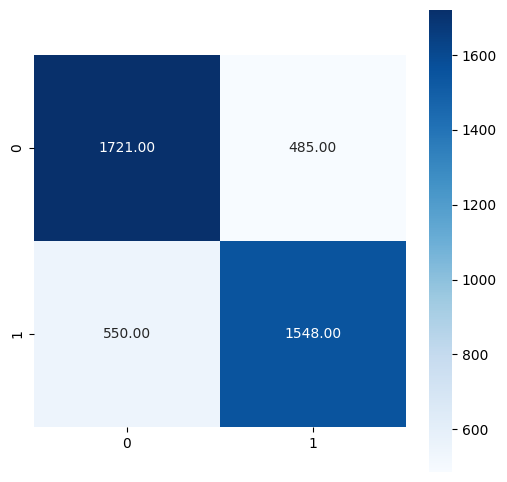

Train Accuracy of Logistic Regression: 0.7525
Test Accuracy of Logistic Regression: 0.7595
[0.7614363010329562, 0.7378455672068637, 0.7494553376906318]
---


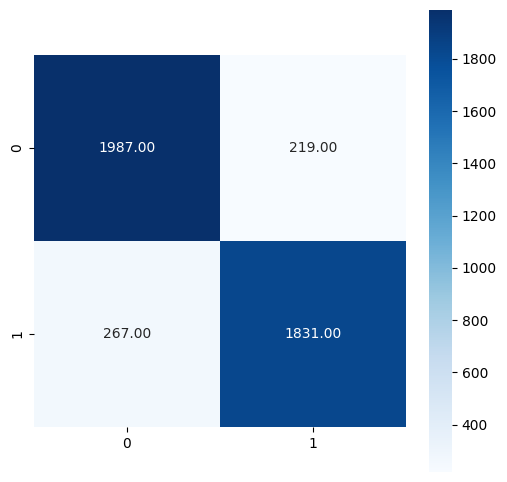

Train Accuracy of Random Forest: 0.9984
Test Accuracy of Random Forest: 0.8871
[0.8931707317073171, 0.8727359389895138, 0.8828351012536162]
---


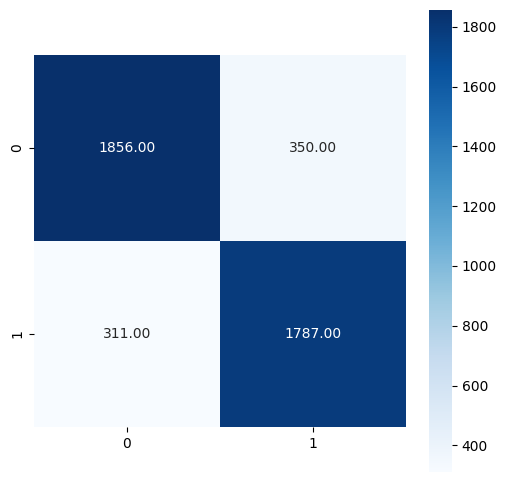

Train Accuracy of Decision Tree: 0.9984
Test Accuracy of Decision Tree: 0.8464
[0.8362189985961629, 0.8517635843660629, 0.8439197166469893]
---


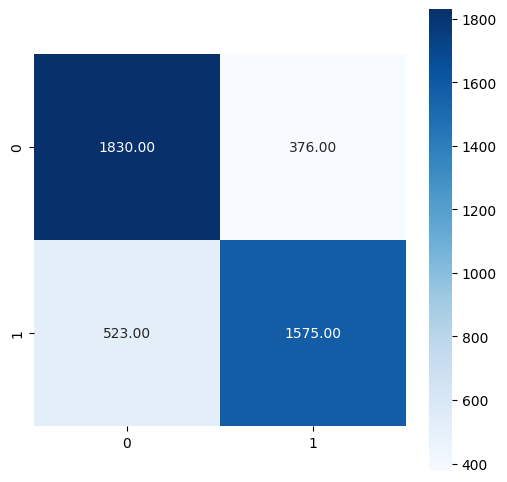

Train Accuracy of K Nearest Neighbours: 0.8542
Test Accuracy of K Nearest Neighbours: 0.7911
[0.8072783188108662, 0.7507149666348903, 0.7779698691034823]
---


In [ ]:
if isinstance(X, np.ndarray):
    # If X is a NumPy array, create a DataFrame with placeholder column names
    # Replace 'feature_1', 'feature_2', ... with your actual feature names
    X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K Nearest Neighbours': KNeighborsClassifier()
}

# Train models and calculate accuracy and ROC curve
plt.figure(figsize=(12, 8))

train_accuracies = []
test_accuracies = []
model_names = []
# metrics = []
# cmatrices = []


feature_importance_df = pd.DataFrame(index=X.columns)

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on training set
    y_train_pred = model.predict(X_train)
    
    # Make predictions on test set
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy on training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    precision_ = precision_score(y_test, y_test_pred)
    recall_ = recall_score(y_test, y_test_pred)
    f1_ = f1_score(y_test, y_test_pred)
    cm_ = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm_, annot=True, cmap="Blues", fmt=".2f", square=True)
    plt.show()
    # plt.xlabel("Predicted Labels")
    # plt.ylabel("True Labels")
    # plt.title("Confusion Matrix")
    # plt.show()
    
    print(f'Train Accuracy of {model_name}: {train_accuracy:.4f}')
    print(f'Test Accuracy of {model_name}: {test_accuracy:.4f}')
    
    model_names.append(model_name)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print([precision_, recall_, f1_])
    print('---')
    


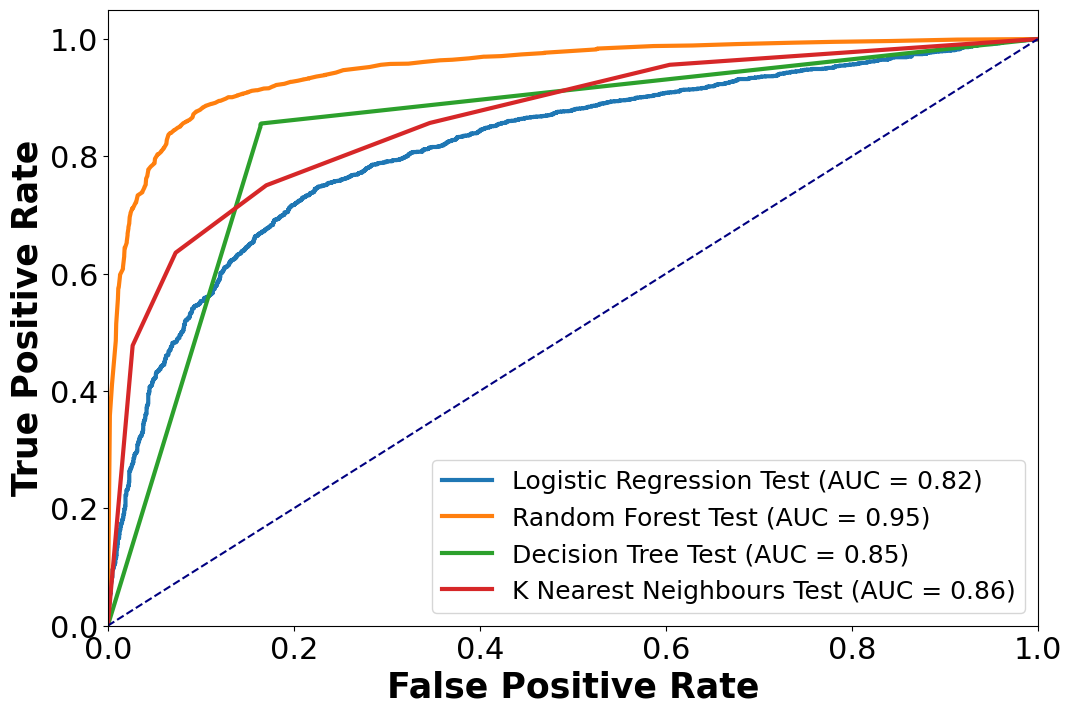

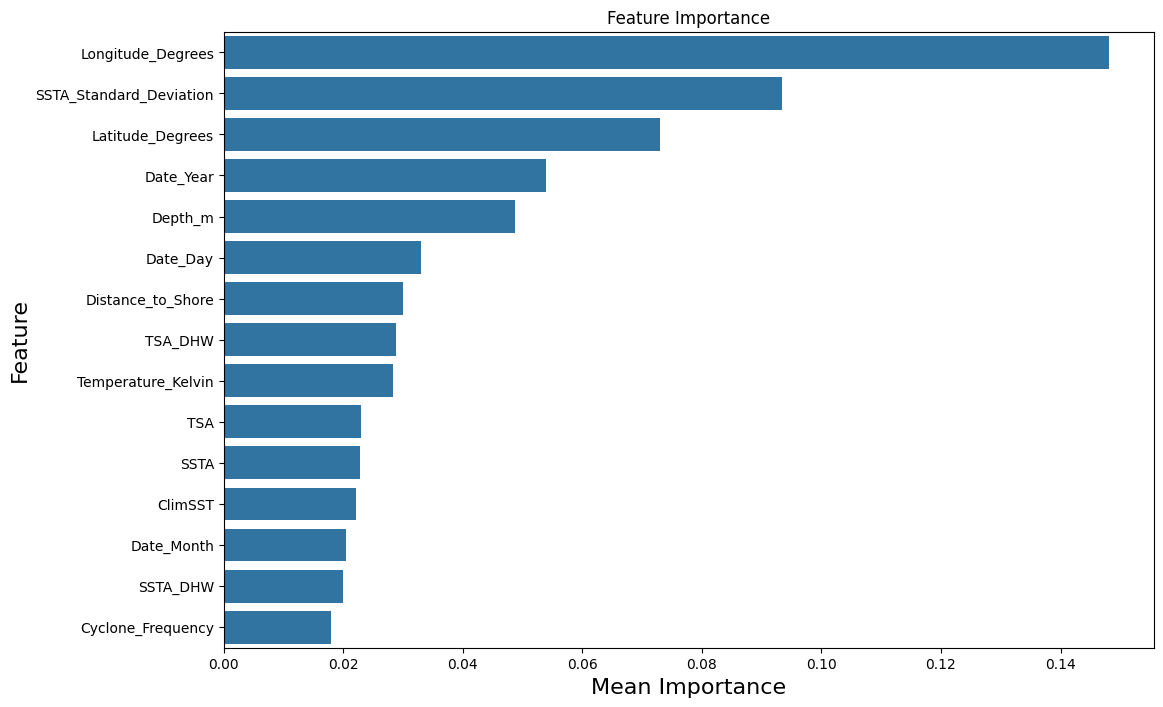

In [16]:
if isinstance(X, np.ndarray):
    # If X is a NumPy array, create a DataFrame with placeholder column names
    # Replace 'feature_1', 'feature_2', ... with your actual feature names
    X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K Nearest Neighbours': KNeighborsClassifier()
}

# Train models and calculate accuracy and ROC curve
plt.figure(figsize=(12, 8))

train_accuracies = []
test_accuracies = []
model_names = []
# metrics = []
# cmatrices = []


feature_importance_df = pd.DataFrame(index=X.columns)

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on training set
    y_train_pred = model.predict(X_train)

    # Make predictions on test set
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate accuracy on training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Calculate ROC curve on test set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    # Plot ROC curve for test set
    plt.plot(fpr_test, tpr_test, label=f'{model_name} Test (AUC = {roc_auc_test:.2f})', linewidth=3)
    
    # Calculate ROC curve on training set
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Get feature importances for models that support it
    if model_name in ['Random Forest', 'Decision Tree']:
        importances = model.feature_importances_
        feature_importance_df[model_name] = importances
        # Plot ROC curve for training set
    # plt.plot(fpr_train, tpr_train, linestyle='--', label=f'{model_name} Train (AUC = {roc_auc_train:.2f})')

# Plot settings for ROC curve
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=25, weight = 'bold')
plt.ylabel('True Positive Rate', fontsize=25, weight = 'bold' )
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20, weight = 'bold')
plt.legend(loc="lower right", fontsize=18)
plt.show()


# Plot feature importances
if not feature_importance_df.empty:
    feature_importance_df['Mean Importance'] = feature_importance_df.mean(axis=1)
    feature_importance_df = feature_importance_df.sort_values(by='Mean Importance', ascending=False)
    feature_importance_df = feature_importance_df.iloc[:15]
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Mean Importance', y=feature_importance_df.index, data=feature_importance_df)
    plt.title('Feature Importance')
    plt.xlabel('Mean Importance', fontsize = 18)
    plt.ylabel('Feature', fontsize = 18)
    plt.show()

In [17]:
feature_importance_df

,Random Forest,Decision Tree,Mean Importance
Longitude_Degrees,0.087647,0.208747,0.148197
SSTA_Standard_Deviation,0.073914,0.112997,0.093456
Latitude_Degrees,0.058944,0.087181,0.073062
Date_Year,0.041727,0.066115,0.053921
Depth_m,0.046273,0.051180,0.048727
Date_Day,0.031805,0.034165,0.032985
Distance_to_Shore,0.033684,0.026243,0.029963
TSA_DHW,0.026018,0.031490,0.028754
Temperature_Kelvin,0.027161,0.029404,0.028283
TSA,0.027653,0.018398,0.023025


In [18]:
feature_importance_df.sort_values(by=['Random Forest'], ascending=False)

,Random Forest,Decision Tree,Mean Importance
Longitude_Degrees,0.087647,0.208747,0.148197
SSTA_Standard_Deviation,0.073914,0.112997,0.093456
Latitude_Degrees,0.058944,0.087181,0.073062
Depth_m,0.046273,0.051180,0.048727
Date_Year,0.041727,0.066115,0.053921
Distance_to_Shore,0.033684,0.026243,0.029963
Date_Day,0.031805,0.034165,0.032985
TSA,0.027653,0.018398,0.023025
Temperature_Kelvin,0.027161,0.029404,0.028283
TSA_DHW,0.026018,0.031490,0.028754


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


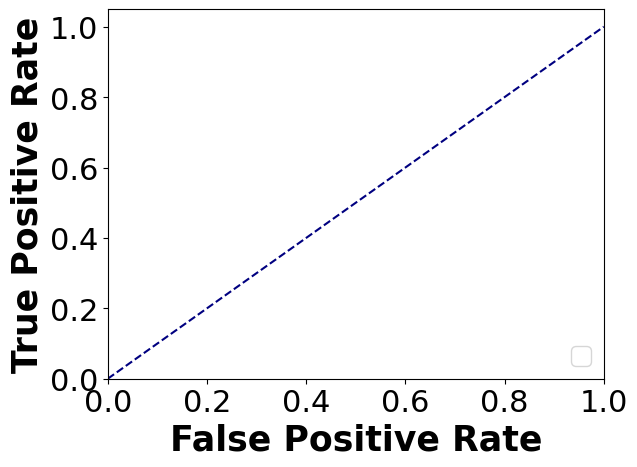

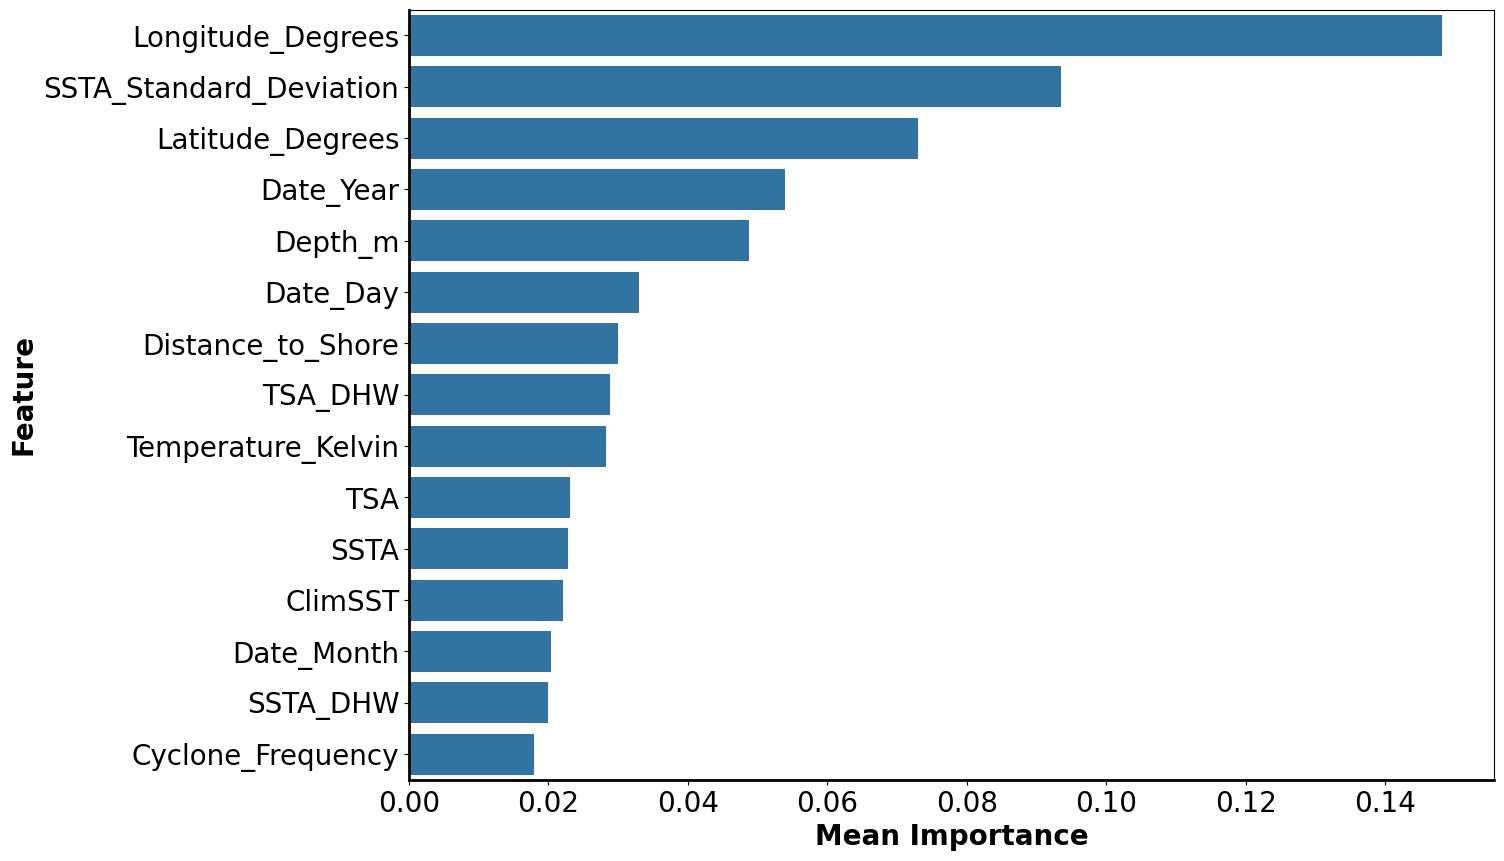

In [190]:
# Plot settings for ROC curve
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=25, weight = 'bold')
plt.ylabel('True Positive Rate', fontsize=25, weight = 'bold' )
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20, weight = 'bold')
plt.legend(loc="lower right", fontsize=18)
plt.show()


# Plot feature importances
if not feature_importance_df.empty:
    feature_importance_df['Mean Importance'] = feature_importance_df.mean(axis=1)
    feature_importance_df = feature_importance_df.sort_values(by='Mean Importance', ascending=False)
    
    plt.figure(figsize=(14, 10))
    sns.barplot(x='Mean Importance', y=feature_importance_df.index, data=feature_importance_df)
    # plt.title('Feature Importance')
    plt.xlabel('Mean Importance', fontsize=20,  weight = 'bold')
    plt.ylabel('Feature', fontsize=20,  weight = 'bold')
    # Increase the font size of the y-axis (feature names)
    plt.yticks(fontsize=20)  # Change '12' to whatever font size you prefer
    plt.xticks(fontsize=20)
    ax = plt.gca()  # Get current axes
    ax.spines['left'].set_linewidth(2)  # Left (y-axis spine)
    ax.spines['bottom'].set_linewidth(2)

